In [455]:
#Import required libraries
import numpy as np 
import pandas as pd
import ast
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

!pip install xgboost
import xgboost as xgb
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.formula.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
%matplotlib inline
import matplotlib.pylab as plt

import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

import dmba


In [456]:
# Load data from CSV file into a DataFrame
df = pd.read_csv('/Users/abithapasupuleti/Downloads/Book1.csv')

# List to store dictionaries for each row
data_list = []

# Function to process each row in the DataFrame
def process_data(row):
    # Extracting relevant fields
    community_title = row['community_title']
    price = ast.literal_eval(row['price'])  # Safely evaluate the string as a Python expression
    floor_details = ast.literal_eval(row['floor_details'])
    price_details = ast.literal_eval(row['price_details'])
    score = row['score']
    city = row['city']

    # Creating a dictionary for each combination of floor_detail and price_detail
    for floor_detail, price_detail in zip(floor_details, price_details):
        data_list.append({
            'Community Title': community_title,
            'Price': price,
            'Floor Detail': floor_detail,
            'Price Detail': price_detail,
            'Neighborhood Score': score,
            'City Name': city,
        })

# Iterate through rows using iterrows()
for _, row in df.iterrows():
    process_data(row)

ca = pd.DataFrame(data_list)
print(ca)


             Community Title            Price  \
0                    Bel Air  [$2,027-$3,231]   
1                    Bel Air  [$2,027-$3,231]   
2                    Bel Air  [$2,027-$3,231]   
3                    Bel Air  [$2,027-$3,231]   
4                    Bel Air  [$2,027-$3,231]   
..                       ...              ...   
714  The Pointe at Cupertino               []   
715  The Pointe at Cupertino               []   
716  The Pointe at Cupertino               []   
717  The Pointe at Cupertino               []   
718  The Pointe at Cupertino               []   

                         Floor Detail          Price Detail  \
0        Studio / 1 Bath\n436 sq. ft.  Starting from $2,027   
1        1 Beds / 1 Bath\n712 sq. ft.  Starting from $2,248   
2        1 Beds / 1 Bath\n702 sq. ft.  Starting from $2,313   
3        2 Beds / 2 Bath\n900 sq. ft.  Starting from $2,749   
4      2 Beds / 2 Bath\n1,093 sq. ft.  Starting from $3,051   
..                               

In [209]:
ca

,Community Title,Price,Floor Detail,Price Detail,Neighborhood Score,City Name
0,Bel Air,"[$2,027-$3,231]",Studio / 1 Bath\n436 sq. ft.,"Starting from $2,027",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
1,Bel Air,"[$2,027-$3,231]",1 Beds / 1 Bath\n712 sq. ft.,"Starting from $2,248",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
2,Bel Air,"[$2,027-$3,231]",1 Beds / 1 Bath\n702 sq. ft.,"Starting from $2,313",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
3,Bel Air,"[$2,027-$3,231]",2 Beds / 2 Bath\n900 sq. ft.,"Starting from $2,749",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
4,Bel Air,"[$2,027-$3,231]","2 Beds / 2 Bath\n1,093 sq. ft.","Starting from $3,051",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
...,...,...,...,...,...,...
714,The Pointe at Cupertino,[],"2 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...
715,The Pointe at Cupertino,[],2 Beds / 1.5 Bath\n960 sq. ft.,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...
716,The Pointe at Cupertino,[],"3 Beds / 1.5 Bath\n1,212 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...
717,The Pointe at Cupertino,[],"3 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...


In [457]:
ca.dtypes

Community Title       object
Price                 object
Floor Detail          object
Price Detail          object
Neighborhood Score    object
City Name             object
dtype: object

In [458]:
# Convert to string 
ca['Price'] = ca['Price'].astype(str)  # Convert to string if not already

# Remove commas and other unwanted characters
ca['Price'] = ca['Price'].str.replace('[^\d.]', '',regex=True)

# Convert the column to numeric values
ca['Price'] = pd.to_numeric(ca['Price'], errors='coerce')

In [459]:
ca

,Community Title,Price,Floor Detail,Price Detail,Neighborhood Score,City Name
0,Bel Air,20273231.0,Studio / 1 Bath\n436 sq. ft.,"Starting from $2,027",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
1,Bel Air,20273231.0,1 Beds / 1 Bath\n712 sq. ft.,"Starting from $2,248",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
2,Bel Air,20273231.0,1 Beds / 1 Bath\n702 sq. ft.,"Starting from $2,313",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
3,Bel Air,20273231.0,2 Beds / 2 Bath\n900 sq. ft.,"Starting from $2,749",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
4,Bel Air,20273231.0,"2 Beds / 2 Bath\n1,093 sq. ft.","Starting from $3,051",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
...,...,...,...,...,...,...
714,The Pointe at Cupertino,NaN,"2 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...
715,The Pointe at Cupertino,NaN,2 Beds / 1.5 Bath\n960 sq. ft.,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...
716,The Pointe at Cupertino,NaN,"3 Beds / 1.5 Bath\n1,212 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...
717,The Pointe at Cupertino,NaN,"3 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...


In [460]:
ca['Price'] = ca['Price'].astype(str) 
ca

,Community Title,Price,Floor Detail,Price Detail,Neighborhood Score,City Name
0,Bel Air,20273231.0,Studio / 1 Bath\n436 sq. ft.,"Starting from $2,027",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
1,Bel Air,20273231.0,1 Beds / 1 Bath\n712 sq. ft.,"Starting from $2,248",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
2,Bel Air,20273231.0,1 Beds / 1 Bath\n702 sq. ft.,"Starting from $2,313",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
3,Bel Air,20273231.0,2 Beds / 2 Bath\n900 sq. ft.,"Starting from $2,749",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
4,Bel Air,20273231.0,"2 Beds / 2 Bath\n1,093 sq. ft.","Starting from $3,051",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...
...,...,...,...,...,...,...
714,The Pointe at Cupertino,nan,"2 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...
715,The Pointe at Cupertino,nan,2 Beds / 1.5 Bath\n960 sq. ft.,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...
716,The Pointe at Cupertino,nan,"3 Beds / 1.5 Bath\n1,212 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...
717,The Pointe at Cupertino,nan,"3 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...


In [461]:
ca['MinPrice'] = ca['Price'].str[:4]
ca['MaxPrice'] = ca['Price'].str[4:]

In [462]:
ca

,Community Title,Price,Floor Detail,Price Detail,Neighborhood Score,City Name,MinPrice,MaxPrice
0,Bel Air,20273231.0,Studio / 1 Bath\n436 sq. ft.,"Starting from $2,027",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231.0
1,Bel Air,20273231.0,1 Beds / 1 Bath\n712 sq. ft.,"Starting from $2,248",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231.0
2,Bel Air,20273231.0,1 Beds / 1 Bath\n702 sq. ft.,"Starting from $2,313",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231.0
3,Bel Air,20273231.0,2 Beds / 2 Bath\n900 sq. ft.,"Starting from $2,749",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231.0
4,Bel Air,20273231.0,"2 Beds / 2 Bath\n1,093 sq. ft.","Starting from $3,051",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231.0
...,...,...,...,...,...,...,...,...
714,The Pointe at Cupertino,nan,"2 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,nan,
715,The Pointe at Cupertino,nan,2 Beds / 1.5 Bath\n960 sq. ft.,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,nan,
716,The Pointe at Cupertino,nan,"3 Beds / 1.5 Bath\n1,212 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,nan,
717,The Pointe at Cupertino,nan,"3 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,nan,


In [463]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Community Title     719 non-null    object
 1   Price               719 non-null    object
 2   Floor Detail        719 non-null    object
 3   Price Detail        719 non-null    object
 4   Neighborhood Score  719 non-null    object
 5   City Name           719 non-null    object
 6   MinPrice            719 non-null    object
 7   MaxPrice            719 non-null    object
dtypes: object(8)
memory usage: 45.1+ KB


## Changing Price column to Min & Max based on the range 
## Then Converting String to numerical and replacing null values with 0

In [464]:
ca['MinPrice'] = pd.to_numeric(ca['MinPrice'], errors='coerce')
ca['MaxPrice'] = pd.to_numeric(ca['MaxPrice'], errors='coerce')

In [465]:
ca['MinPrice'].fillna(0, inplace=True)
ca['MaxPrice'].fillna(0, inplace=True)

In [466]:
ca['MinPrice'] = ca['MinPrice'].astype(int)
ca['MaxPrice'] = ca['MaxPrice'].astype(int)


In [467]:
#Detecting null values
null_values = ca.isnull().sum()

# Print the null values for each column
print(null_values)

Community Title       0
Price                 0
Floor Detail          0
Price Detail          0
Neighborhood Score    0
City Name             0
MinPrice              0
MaxPrice              0
dtype: int64


In [468]:
# Drop coloumn price
ca = ca.drop(columns=['Price'])
ca

,Community Title,Floor Detail,Price Detail,Neighborhood Score,City Name,MinPrice,MaxPrice
0,Bel Air,Studio / 1 Bath\n436 sq. ft.,"Starting from $2,027",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231
1,Bel Air,1 Beds / 1 Bath\n712 sq. ft.,"Starting from $2,248",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231
2,Bel Air,1 Beds / 1 Bath\n702 sq. ft.,"Starting from $2,313",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231
3,Bel Air,2 Beds / 2 Bath\n900 sq. ft.,"Starting from $2,749",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231
4,Bel Air,"2 Beds / 2 Bath\n1,093 sq. ft.","Starting from $3,051",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231
...,...,...,...,...,...,...,...
714,The Pointe at Cupertino,"2 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0
715,The Pointe at Cupertino,2 Beds / 1.5 Bath\n960 sq. ft.,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0
716,The Pointe at Cupertino,"3 Beds / 1.5 Bath\n1,212 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0
717,The Pointe at Cupertino,"3 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0


In [469]:
ca['Floor Detail'] = ca['Floor Detail'].str.replace('Studio', '0 Beds')

In [470]:
ca

,Community Title,Floor Detail,Price Detail,Neighborhood Score,City Name,MinPrice,MaxPrice
0,Bel Air,0 Beds / 1 Bath\n436 sq. ft.,"Starting from $2,027",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231
1,Bel Air,1 Beds / 1 Bath\n712 sq. ft.,"Starting from $2,248",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231
2,Bel Air,1 Beds / 1 Bath\n702 sq. ft.,"Starting from $2,313",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231
3,Bel Air,2 Beds / 2 Bath\n900 sq. ft.,"Starting from $2,749",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231
4,Bel Air,"2 Beds / 2 Bath\n1,093 sq. ft.","Starting from $3,051",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231
...,...,...,...,...,...,...,...
714,The Pointe at Cupertino,"2 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0
715,The Pointe at Cupertino,2 Beds / 1.5 Bath\n960 sq. ft.,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0
716,The Pointe at Cupertino,"3 Beds / 1.5 Bath\n1,212 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0
717,The Pointe at Cupertino,"3 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0


In [471]:
# Floor detail are splitted into NRooms, NBath, sqft, 
pattern = r'(?P<NRooms>Studio|\d+) (?:Beds|Bed) \/ (?P<NBath>[\d.]+) Bath\n(?P<sqft>[\d,]+)(?: - [\d,]+)? sq\. ft.'

# Extract info into new columns
matches = ca['Floor Detail'].str.extract(pattern)

# Replace 'Studio' with 0 in 'NRooms' column
matches['NRooms'] = matches['NRooms'].replace('Studio', 0)

# Convert numeric columns to appropriate data types
matches['NRooms'] = pd.to_numeric(matches['NRooms'], errors='coerce')
matches['NBath'] = pd.to_numeric(matches['NBath'], errors='coerce')

# Extract the first number in the sqft range
matches['sqft'] = matches['sqft'].str.replace(',', '')  # Remove commas before extracting
matches['sqft'] = matches['sqft'].str.extract(r'(\d+)')

# Convert the 'sqft' column to numeric
matches['sqft'] = pd.to_numeric(matches['sqft'], errors='coerce')
ca = pd.concat([ca, matches], axis=1)

In [473]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Community Title     719 non-null    object 
 1   Floor Detail        719 non-null    object 
 2   Price Detail        719 non-null    object 
 3   Neighborhood Score  719 non-null    object 
 4   City Name           719 non-null    object 
 5   MinPrice            719 non-null    int64  
 6   MaxPrice            719 non-null    int64  
 7   NRooms              719 non-null    int64  
 8   NBath               719 non-null    float64
 9   sqft                719 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 56.3+ KB


In [474]:
ca

,Community Title,Floor Detail,Price Detail,Neighborhood Score,City Name,MinPrice,MaxPrice,NRooms,NBath,sqft
0,Bel Air,0 Beds / 1 Bath\n436 sq. ft.,"Starting from $2,027",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231,0,1.0,436
1,Bel Air,1 Beds / 1 Bath\n712 sq. ft.,"Starting from $2,248",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231,1,1.0,712
2,Bel Air,1 Beds / 1 Bath\n702 sq. ft.,"Starting from $2,313",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231,1,1.0,702
3,Bel Air,2 Beds / 2 Bath\n900 sq. ft.,"Starting from $2,749",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231,2,2.0,900
4,Bel Air,"2 Beds / 2 Bath\n1,093 sq. ft.","Starting from $3,051",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231,2,2.0,1093
...,...,...,...,...,...,...,...,...,...,...
714,The Pointe at Cupertino,"2 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0,2,1.5,1152
715,The Pointe at Cupertino,2 Beds / 1.5 Bath\n960 sq. ft.,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0,2,1.5,960
716,The Pointe at Cupertino,"3 Beds / 1.5 Bath\n1,212 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0,3,1.5,1212
717,The Pointe at Cupertino,"3 Beds / 1.5 Bath\n1,152 sq. ft.",,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0,3,1.5,1152


In [475]:
ca = ca.drop(columns=['Floor Detail'])
ca

,Community Title,Price Detail,Neighborhood Score,City Name,MinPrice,MaxPrice,NRooms,NBath,sqft
0,Bel Air,"Starting from $2,027",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231,0,1.0,436
1,Bel Air,"Starting from $2,248",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231,1,1.0,712
2,Bel Air,"Starting from $2,313",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231,1,1.0,702
3,Bel Air,"Starting from $2,749",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231,2,2.0,900
4,Bel Air,"Starting from $3,051",14%\nWalk Score,Bel Air Apartments\n2000 Shoreline Drive\nSan ...,2027,3231,2,2.0,1093
...,...,...,...,...,...,...,...,...,...
714,The Pointe at Cupertino,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0,2,1.5,1152
715,The Pointe at Cupertino,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0,2,1.5,960
716,The Pointe at Cupertino,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0,3,1.5,1212
717,The Pointe at Cupertino,,52%\nWalk Score,The Pointe at Cupertino Apartments\n19920 Oliv...,0,0,3,1.5,1152


In [476]:
ca['City Name']

0      Bel Air Apartments\n2000 Shoreline Drive\nSan ...
1      Bel Air Apartments\n2000 Shoreline Drive\nSan ...
2      Bel Air Apartments\n2000 Shoreline Drive\nSan ...
3      Bel Air Apartments\n2000 Shoreline Drive\nSan ...
4      Bel Air Apartments\n2000 Shoreline Drive\nSan ...
                             ...                        
714    The Pointe at Cupertino Apartments\n19920 Oliv...
715    The Pointe at Cupertino Apartments\n19920 Oliv...
716    The Pointe at Cupertino Apartments\n19920 Oliv...
717    The Pointe at Cupertino Apartments\n19920 Oliv...
718    The Pointe at Cupertino Apartments\n19920 Oliv...
Name: City Name, Length: 719, dtype: object

In [477]:
# Splitting the City Name column and name it City
ca['City'] = ca['City Name'].str.rsplit('\n', n=1).str[-1]
print(ca[['City Name', 'City']])

                                             City Name                 City
0    Bel Air Apartments\n2000 Shoreline Drive\nSan ...  San Ramon, CA 94582
1    Bel Air Apartments\n2000 Shoreline Drive\nSan ...  San Ramon, CA 94582
2    Bel Air Apartments\n2000 Shoreline Drive\nSan ...  San Ramon, CA 94582
3    Bel Air Apartments\n2000 Shoreline Drive\nSan ...  San Ramon, CA 94582
4    Bel Air Apartments\n2000 Shoreline Drive\nSan ...  San Ramon, CA 94582
..                                                 ...                  ...
714  The Pointe at Cupertino Apartments\n19920 Oliv...  Cupertino, CA 95014
715  The Pointe at Cupertino Apartments\n19920 Oliv...  Cupertino, CA 95014
716  The Pointe at Cupertino Apartments\n19920 Oliv...  Cupertino, CA 95014
717  The Pointe at Cupertino Apartments\n19920 Oliv...  Cupertino, CA 95014
718  The Pointe at Cupertino Apartments\n19920 Oliv...  Cupertino, CA 95014

[719 rows x 2 columns]


In [478]:
ca = ca.drop('City Name', axis=1)
ca.head()

,Community Title,Price Detail,Neighborhood Score,MinPrice,MaxPrice,NRooms,NBath,sqft,City
0,Bel Air,"Starting from $2,027",14%\nWalk Score,2027,3231,0,1.0,436,"San Ramon, CA 94582"
1,Bel Air,"Starting from $2,248",14%\nWalk Score,2027,3231,1,1.0,712,"San Ramon, CA 94582"
2,Bel Air,"Starting from $2,313",14%\nWalk Score,2027,3231,1,1.0,702,"San Ramon, CA 94582"
3,Bel Air,"Starting from $2,749",14%\nWalk Score,2027,3231,2,2.0,900,"San Ramon, CA 94582"
4,Bel Air,"Starting from $3,051",14%\nWalk Score,2027,3231,2,2.0,1093,"San Ramon, CA 94582"


In [479]:
ca[['City Name', 'PIN Code']] = ca['City'].str.extract(r'([^\d]+)\s*(\d+)$')
print(ca[['City', 'City Name', 'PIN Code']])

                    City       City Name PIN Code
0    San Ramon, CA 94582  San Ramon, CA     94582
1    San Ramon, CA 94582  San Ramon, CA     94582
2    San Ramon, CA 94582  San Ramon, CA     94582
3    San Ramon, CA 94582  San Ramon, CA     94582
4    San Ramon, CA 94582  San Ramon, CA     94582
..                   ...             ...      ...
714  Cupertino, CA 95014  Cupertino, CA     95014
715  Cupertino, CA 95014  Cupertino, CA     95014
716  Cupertino, CA 95014  Cupertino, CA     95014
717  Cupertino, CA 95014  Cupertino, CA     95014
718  Cupertino, CA 95014  Cupertino, CA     95014

[719 rows x 3 columns]


In [480]:
ca = ca.drop(['City','PIN Code'], axis=1)
ca

,Community Title,Price Detail,Neighborhood Score,MinPrice,MaxPrice,NRooms,NBath,sqft,City Name
0,Bel Air,"Starting from $2,027",14%\nWalk Score,2027,3231,0,1.0,436,"San Ramon, CA"
1,Bel Air,"Starting from $2,248",14%\nWalk Score,2027,3231,1,1.0,712,"San Ramon, CA"
2,Bel Air,"Starting from $2,313",14%\nWalk Score,2027,3231,1,1.0,702,"San Ramon, CA"
3,Bel Air,"Starting from $2,749",14%\nWalk Score,2027,3231,2,2.0,900,"San Ramon, CA"
4,Bel Air,"Starting from $3,051",14%\nWalk Score,2027,3231,2,2.0,1093,"San Ramon, CA"
...,...,...,...,...,...,...,...,...,...
714,The Pointe at Cupertino,,52%\nWalk Score,0,0,2,1.5,1152,"Cupertino, CA"
715,The Pointe at Cupertino,,52%\nWalk Score,0,0,2,1.5,960,"Cupertino, CA"
716,The Pointe at Cupertino,,52%\nWalk Score,0,0,3,1.5,1212,"Cupertino, CA"
717,The Pointe at Cupertino,,52%\nWalk Score,0,0,3,1.5,1152,"Cupertino, CA"


In [482]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Community Title     719 non-null    object 
 1   Price Detail        719 non-null    object 
 2   Neighborhood Score  719 non-null    object 
 3   MinPrice            719 non-null    int64  
 4   MaxPrice            719 non-null    int64  
 5   NRooms              719 non-null    int64  
 6   NBath               719 non-null    float64
 7   sqft                719 non-null    int64  
 8   City Name           719 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 50.7+ KB


In [483]:
pattern = r'(\d+)'

# Create new column for Neighborhood score and name it Accessibility Score
ca['Accessbility Score'] = ca['Neighborhood Score'].str.extract(pattern)

# Convert the Accessibility Score column to numerical data type
ca['Accessbility Score'] = pd.to_numeric(ca['Accessbility Score'], errors='coerce')

In [485]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Community Title     719 non-null    object 
 1   Price Detail        719 non-null    object 
 2   Neighborhood Score  719 non-null    object 
 3   MinPrice            719 non-null    int64  
 4   MaxPrice            719 non-null    int64  
 5   NRooms              719 non-null    int64  
 6   NBath               719 non-null    float64
 7   sqft                719 non-null    int64  
 8   City Name           719 non-null    object 
 9   Accessbility Score  719 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 56.3+ KB


In [486]:
ca = ca.drop(columns=['Neighborhood Score'])
ca

,Community Title,Price Detail,MinPrice,MaxPrice,NRooms,NBath,sqft,City Name,Accessbility Score
0,Bel Air,"Starting from $2,027",2027,3231,0,1.0,436,"San Ramon, CA",14
1,Bel Air,"Starting from $2,248",2027,3231,1,1.0,712,"San Ramon, CA",14
2,Bel Air,"Starting from $2,313",2027,3231,1,1.0,702,"San Ramon, CA",14
3,Bel Air,"Starting from $2,749",2027,3231,2,2.0,900,"San Ramon, CA",14
4,Bel Air,"Starting from $3,051",2027,3231,2,2.0,1093,"San Ramon, CA",14
...,...,...,...,...,...,...,...,...,...
714,The Pointe at Cupertino,,0,0,2,1.5,1152,"Cupertino, CA",52
715,The Pointe at Cupertino,,0,0,2,1.5,960,"Cupertino, CA",52
716,The Pointe at Cupertino,,0,0,3,1.5,1212,"Cupertino, CA",52
717,The Pointe at Cupertino,,0,0,3,1.5,1152,"Cupertino, CA",52


In [487]:
pattern = r'\$(\d{1,3}(?:,\d{3})*(?:\.\d+)?)'

# Create new column for Price Detail and name it Property Price
ca['Property Price'] = ca['Price Detail'].str.extract(pattern)

# Remove commas and convert the new column to numerical data type
ca['Property Price'] = pd.to_numeric(ca['Property Price'].str.replace(',', ''), errors='coerce')

In [488]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Community Title     719 non-null    object 
 1   Price Detail        719 non-null    object 
 2   MinPrice            719 non-null    int64  
 3   MaxPrice            719 non-null    int64  
 4   NRooms              719 non-null    int64  
 5   NBath               719 non-null    float64
 6   sqft                719 non-null    int64  
 7   City Name           719 non-null    object 
 8   Accessbility Score  719 non-null    int64  
 9   Property Price      386 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 56.3+ KB


In [489]:
ca = ca.drop(columns=['Price Detail'])
ca

,Community Title,MinPrice,MaxPrice,NRooms,NBath,sqft,City Name,Accessbility Score,Property Price
0,Bel Air,2027,3231,0,1.0,436,"San Ramon, CA",14,2027.0
1,Bel Air,2027,3231,1,1.0,712,"San Ramon, CA",14,2248.0
2,Bel Air,2027,3231,1,1.0,702,"San Ramon, CA",14,2313.0
3,Bel Air,2027,3231,2,2.0,900,"San Ramon, CA",14,2749.0
4,Bel Air,2027,3231,2,2.0,1093,"San Ramon, CA",14,3051.0
...,...,...,...,...,...,...,...,...,...
714,The Pointe at Cupertino,0,0,2,1.5,1152,"Cupertino, CA",52,NaN
715,The Pointe at Cupertino,0,0,2,1.5,960,"Cupertino, CA",52,NaN
716,The Pointe at Cupertino,0,0,3,1.5,1212,"Cupertino, CA",52,NaN
717,The Pointe at Cupertino,0,0,3,1.5,1152,"Cupertino, CA",52,NaN


In [490]:
ca.shape

(719, 9)

In [491]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Community Title     719 non-null    object 
 1   MinPrice            719 non-null    int64  
 2   MaxPrice            719 non-null    int64  
 3   NRooms              719 non-null    int64  
 4   NBath               719 non-null    float64
 5   sqft                719 non-null    int64  
 6   City Name           719 non-null    object 
 7   Accessbility Score  719 non-null    int64  
 8   Property Price      386 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 50.7+ KB


## DATA THAT WE SHOULD BE CAREFUL OF!

In [492]:
# Defining mean price based on city 
mean_prices_by_city = ca.groupby('City Name')['Property Price'].mean()
mean_prices_by_city


City Name
Belmont, CA           3706.500000
Berkeley, CA          2437.333333
Campbell, CA          2281.500000
Cupertino, CA         2990.250000
Dublin, CA            3129.200000
Emeryville, CA        2823.000000
Foster City, CA       3082.571429
Fremont, CA           2696.933333
Hayward, CA           2406.384615
Lafayette, CA         3085.666667
Menlo Park, CA        4024.666667
Milpitas, CA          3066.857143
Mountain View, CA     3199.500000
Newark, CA            2563.250000
Oakland, CA           2822.000000
Pleasanton, CA        2805.875000
Redwood City, CA      3550.428571
Richmond, CA          2733.000000
San Francisco, CA     3745.931034
San Jose, CA          3117.214286
San Mateo, CA         3120.842105
San Rafael, CA        3321.500000
San Ramon, CA         2669.333333
Santa Clara, CA       3112.259259
Santa Cruz, CA        3494.500000
Sunnyvale, CA         3162.081081
Tiburon, CA           3867.000000
Union City, CA        2166.333333
Walnut Creek, CA      3236.400000
Name

In [493]:
#Create a Property Price Column and Check for notnull value, if there is notnull then it will take average values of MinPrice and MaxPrice
ca['Property Price'] = ca.apply(lambda row: row['Property Price'] if pd.notnull(row['Property Price']) else (row['MinPrice'] + row['MaxPrice']) / 2, axis=1)
# Print the updated DataFrame
print(ca)

             Community Title  MinPrice  MaxPrice  NRooms  NBath  sqft  \
0                    Bel Air      2027      3231       0    1.0   436   
1                    Bel Air      2027      3231       1    1.0   712   
2                    Bel Air      2027      3231       1    1.0   702   
3                    Bel Air      2027      3231       2    2.0   900   
4                    Bel Air      2027      3231       2    2.0  1093   
..                       ...       ...       ...     ...    ...   ...   
714  The Pointe at Cupertino         0         0       2    1.5  1152   
715  The Pointe at Cupertino         0         0       2    1.5   960   
716  The Pointe at Cupertino         0         0       3    1.5  1212   
717  The Pointe at Cupertino         0         0       3    1.5  1152   
718  The Pointe at Cupertino         0         0       3    2.5  1212   

          City Name  Accessbility Score  Property Price  
0    San Ramon, CA                   14          2027.0  
1    Sa

In [494]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Community Title     719 non-null    object 
 1   MinPrice            719 non-null    int64  
 2   MaxPrice            719 non-null    int64  
 3   NRooms              719 non-null    int64  
 4   NBath               719 non-null    float64
 5   sqft                719 non-null    int64  
 6   City Name           719 non-null    object 
 7   Accessbility Score  719 non-null    int64  
 8   Property Price      719 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 50.7+ KB


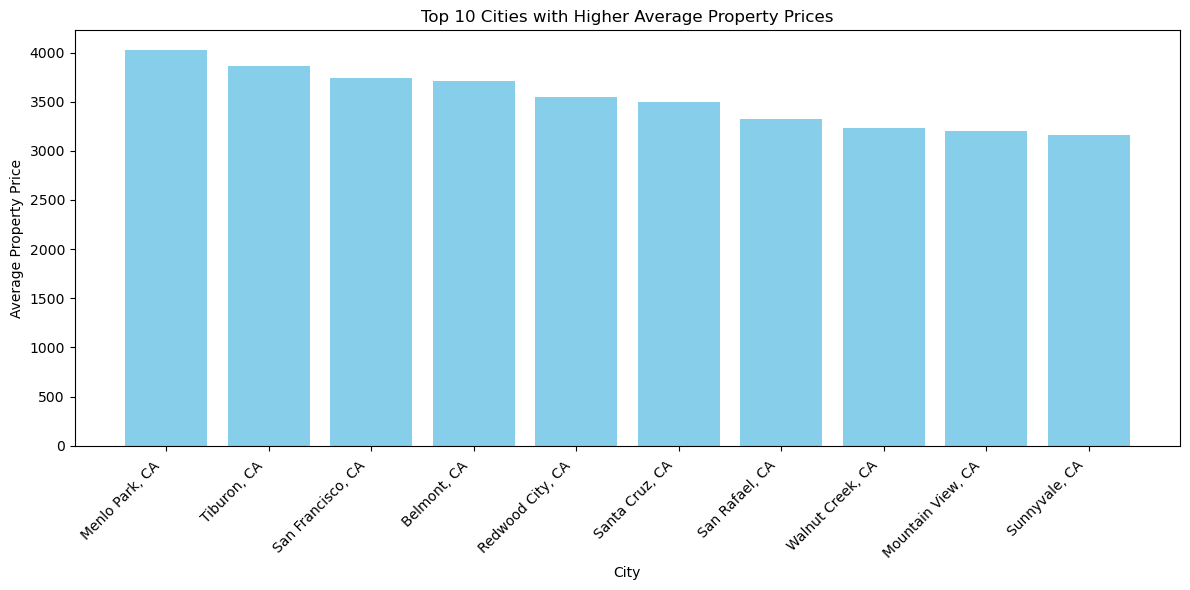

In [495]:
# Bar plot for Top 10 cities with Avg Property Price
top_cities = mean_prices_by_city.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_cities.index, top_cities.values, color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Property Price')
plt.title('Top 10 Cities with Higher Average Property Prices')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


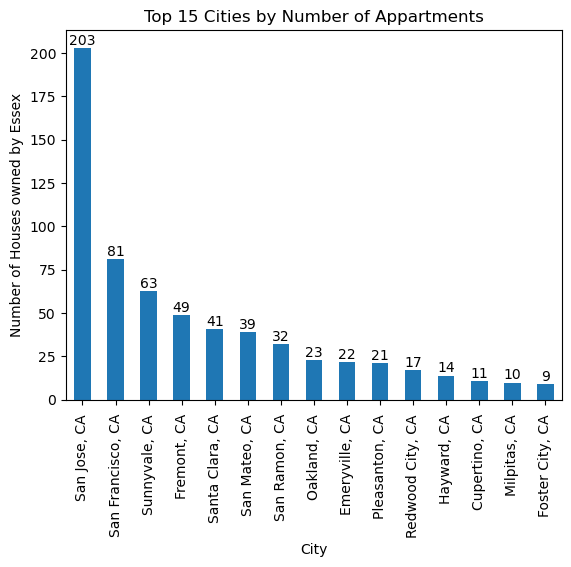

In [496]:
# value_counts funtion is uesed to get the number of properties for each city
city_counts = ca['City Name'].value_counts()

# Select the top 15 cities
top_15_cities = city_counts.head(15)

# bar plot for the number of properties in the top 15 cities
top_15_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Houses owned by Essex')
plt.title('Top 15 Cities by Number of Appartments')
plt.xticks(rotation=90)
for i, v in enumerate(top_15_cities):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

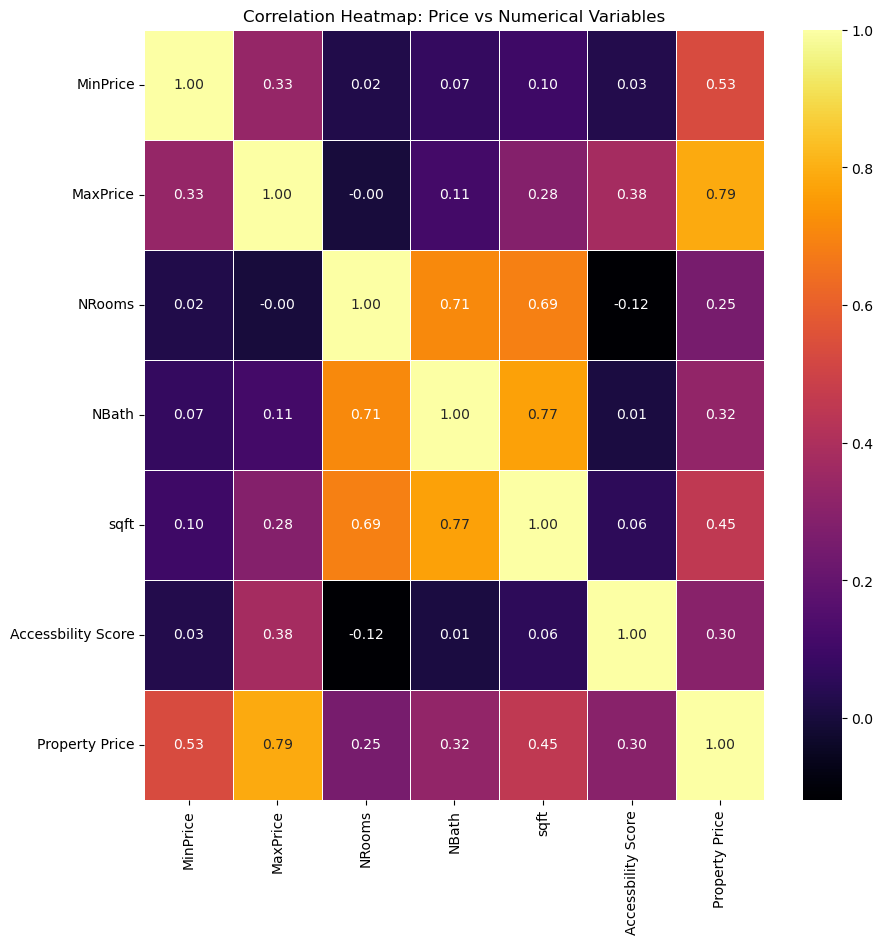

In [497]:
# Plot a heat map between price and all numerical variables
correlation_matrix = ca.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Price vs Numerical Variables')
plt.show()

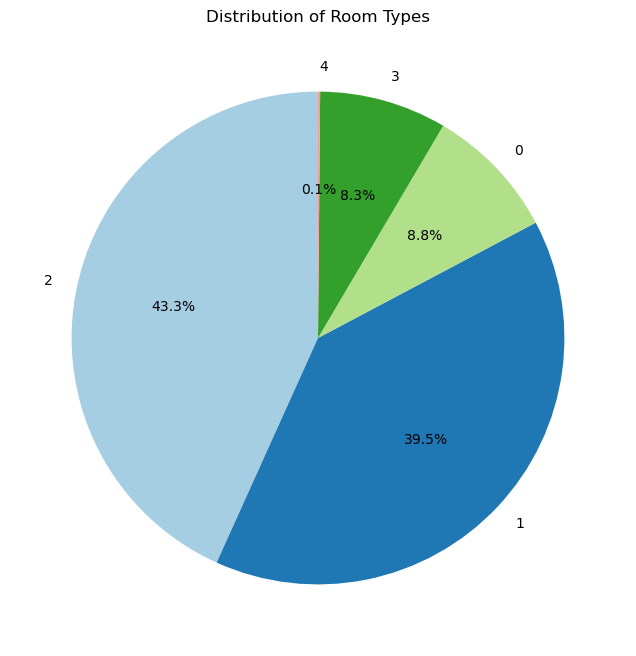

In [498]:
# Pie Chart for displaying distribution of room types
room_counts = ca['NRooms'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Room Types')
plt.show()

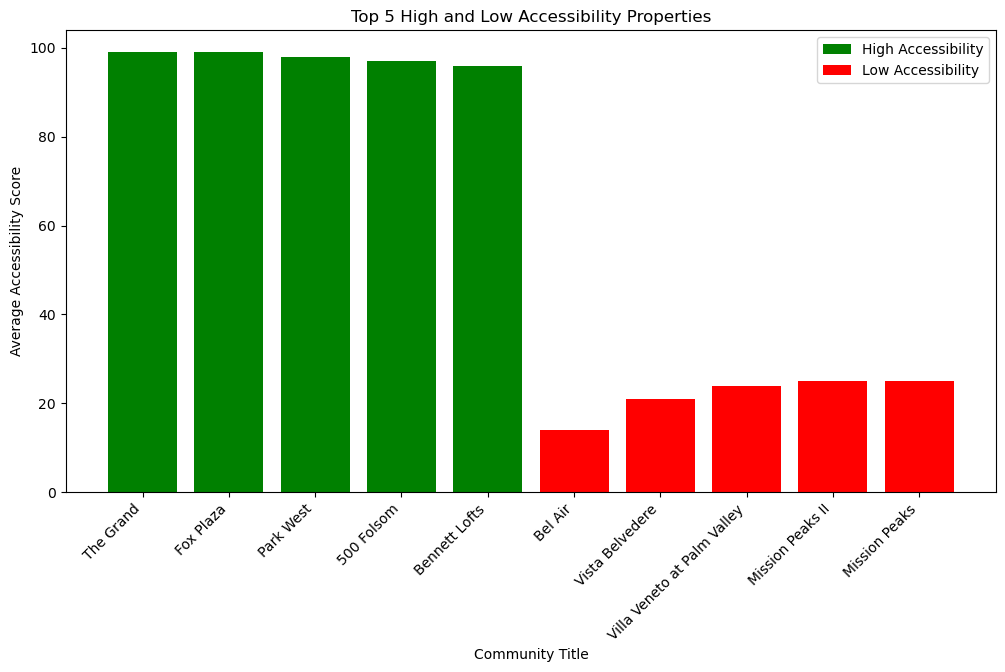

In [499]:
# Bar plot for Top high and low accessiblity score considering average accessibility score and community title
average_accessibility_scores = ca.groupby('Community Title')['Accessbility Score'].mean()
sorted_properties = average_accessibility_scores.sort_values(ascending=False)
top_5_high_accessibility = sorted_properties.nlargest(5)
bottom_5_low_accessibility = sorted_properties.nsmallest(5)
plt.figure(figsize=(12, 6))
plt.bar(top_5_high_accessibility.index, top_5_high_accessibility.values, color='green', label='High Accessibility')
plt.bar(bottom_5_low_accessibility.index, bottom_5_low_accessibility.values, color='red', label='Low Accessibility')
plt.xlabel('Community Title')
plt.ylabel('Average Accessibility Score')
plt.title('Top 5 High and Low Accessibility Properties')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()



In [500]:
ca.shape

(719, 9)

In [501]:
#Filter the houses that has null values in property price column
Ze_filtered_rows = ca[ca['MinPrice'].isin([0, None])]
print(Ze_filtered_rows)

             Community Title  MinPrice  MaxPrice  NRooms  NBath  sqft  \
713  The Pointe at Cupertino         0         0       2    1.5  1212   
714  The Pointe at Cupertino         0         0       2    1.5  1152   
715  The Pointe at Cupertino         0         0       2    1.5   960   
716  The Pointe at Cupertino         0         0       3    1.5  1212   
717  The Pointe at Cupertino         0         0       3    1.5  1152   
718  The Pointe at Cupertino         0         0       3    2.5  1212   

          City Name  Accessbility Score  Property Price  
713  Cupertino, CA                   52             0.0  
714  Cupertino, CA                   52             0.0  
715  Cupertino, CA                   52             0.0  
716  Cupertino, CA                   52             0.0  
717  Cupertino, CA                   52             0.0  
718  Cupertino, CA                   52             0.0  


In [502]:
# remove the properties that has null property price
ca = ca.dropna(subset=['MinPrice'], how='any')
ca = ca[ca['MinPrice'] != 0]
print(ca)

    Community Title  MinPrice  MaxPrice  NRooms  NBath  sqft        City Name  \
0           Bel Air      2027      3231       0    1.0   436   San Ramon, CA    
1           Bel Air      2027      3231       1    1.0   712   San Ramon, CA    
2           Bel Air      2027      3231       1    1.0   702   San Ramon, CA    
3           Bel Air      2027      3231       2    2.0   900   San Ramon, CA    
4           Bel Air      2027      3231       2    2.0  1093   San Ramon, CA    
..              ...       ...       ...     ...    ...   ...              ...   
708    777 Hamilton      3299      4972       2    2.0   997  Menlo Park, CA    
709    777 Hamilton      3299      4972       2    2.0  1039  Menlo Park, CA    
710    777 Hamilton      3299      4972       3    3.0  1375  Menlo Park, CA    
711    777 Hamilton      3299      4972       3    3.0  1569  Menlo Park, CA    
712    777 Hamilton      3299      4972       3    3.0  1448  Menlo Park, CA    

     Accessbility Score  Pr

In [503]:
ca

,Community Title,MinPrice,MaxPrice,NRooms,NBath,sqft,City Name,Accessbility Score,Property Price
0,Bel Air,2027,3231,0,1.0,436,"San Ramon, CA",14,2027.0
1,Bel Air,2027,3231,1,1.0,712,"San Ramon, CA",14,2248.0
2,Bel Air,2027,3231,1,1.0,702,"San Ramon, CA",14,2313.0
3,Bel Air,2027,3231,2,2.0,900,"San Ramon, CA",14,2749.0
4,Bel Air,2027,3231,2,2.0,1093,"San Ramon, CA",14,3051.0
...,...,...,...,...,...,...,...,...,...
708,777 Hamilton,3299,4972,2,2.0,997,"Menlo Park, CA",51,3828.0
709,777 Hamilton,3299,4972,2,2.0,1039,"Menlo Park, CA",51,3883.0
710,777 Hamilton,3299,4972,3,3.0,1375,"Menlo Park, CA",51,4732.0
711,777 Hamilton,3299,4972,3,3.0,1569,"Menlo Park, CA",51,4972.0


In [504]:
# Display the rows with 0 or null in MaxPrice column
rows_with_zero_or_null = ca[(ca['MaxPrice'] == 0) | ca['MaxPrice'].isnull()]
print(rows_with_zero_or_null)

         Community Title  MinPrice  MaxPrice  NRooms  NBath  sqft  \
651  Agora at South Main      4427         0       2    2.0  1209   
652  Agora at South Main      4427         0       2    2.5  1624   
653  Agora at South Main      4427         0       2    2.5  1717   

             City Name  Accessbility Score  Property Price  
651  Walnut Creek, CA                   89          4427.0  
652  Walnut Creek, CA                   89          2213.5  
653  Walnut Creek, CA                   89          2213.5  


In [519]:
ca.to_csv('/Users/abithapasupuleti/Downloads/Book4.csv', index=False)

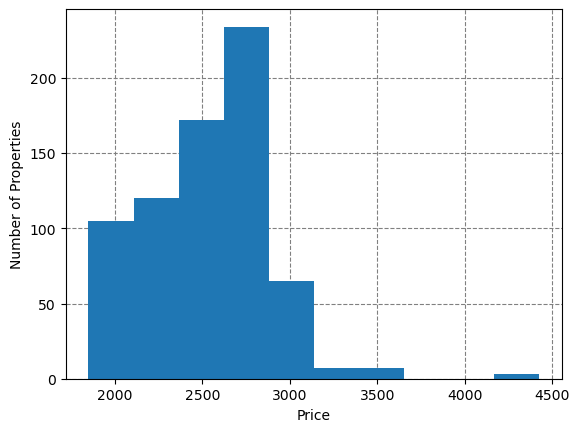

In [505]:
#Plot histogram for number of properties and price
fig, ax = plt.subplots()
ax.hist(ca.MinPrice)
ax.set_axisbelow(True) 
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
plt.show()

## Create Dummies For City Name to convert it to numerical variable type

In [506]:
ca = pd.get_dummies(ca, columns=['City Name'], prefix='city', drop_first=True)

In [507]:
print(ca.columns)

Index(['Community Title', 'MinPrice', 'MaxPrice', 'NRooms', 'NBath', 'sqft',
       'Accessbility Score', 'Property Price', 'city_Berkeley, CA ',
       'city_Campbell, CA ', 'city_Cupertino, CA ', 'city_Dublin, CA ',
       'city_Emeryville, CA ', 'city_Foster City, CA ', 'city_Fremont, CA ',
       'city_Hayward, CA ', 'city_Lafayette, CA ', 'city_Menlo Park, CA ',
       'city_Milpitas, CA ', 'city_Mountain View, CA ', 'city_Newark, CA ',
       'city_Oakland, CA ', 'city_Pleasanton, CA ', 'city_Redwood City, CA ',
       'city_Richmond, CA ', 'city_San Francisco, CA ', 'city_San Jose, CA ',
       'city_San Mateo, CA ', 'city_San Rafael, CA ', 'city_San Ramon, CA ',
       'city_Santa Clara, CA ', 'city_Santa Cruz, CA ', 'city_Sunnyvale, CA ',
       'city_Tiburon, CA ', 'city_Union City, CA ', 'city_Walnut Creek, CA '],
      dtype='object')


## Linear Regression Model 

In [508]:
# Define Variables 
Pred_Variables = ['MinPrice', 'MaxPrice', 'NRooms', 'NBath', 'sqft', 'Accessbility Score', 'city_Berkeley, CA ',
       'city_Campbell, CA ', 'city_Cupertino, CA ', 'city_Dublin, CA ',
       'city_Emeryville, CA ', 'city_Foster City, CA ', 'city_Fremont, CA ',
       'city_Hayward, CA ', 'city_Lafayette, CA ', 'city_Menlo Park, CA ',
       'city_Milpitas, CA ', 'city_Mountain View, CA ', 'city_Newark, CA ',
       'city_Oakland, CA ', 'city_Pleasanton, CA ', 'city_Redwood City, CA ',
       'city_Richmond, CA ', 'city_San Francisco, CA ', 'city_San Jose, CA ',
       'city_San Mateo, CA ', 'city_San Rafael, CA ', 'city_San Ramon, CA ',
       'city_Santa Clara, CA ', 'city_Santa Cruz, CA ', 'city_Sunnyvale, CA ',
       'city_Tiburon, CA ', 'city_Union City, CA ', 'city_Walnut Creek, CA ']


outcome_variable = 'Property Price'

# Divide the data 
X = ca[Pred_Variables]
y = ca[outcome_variable]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Train the linear regression model
ca_lm = LinearRegression()
ca_lm.fit(train_X, train_y)


LinearRegression()

In [509]:
#Calculate r-score for linear regression model on validation set
ca_lm_score = ca_lm.score(valid_X, valid_y)
print("Linear Regression Model Score:", ca_lm_score)

# Make predictions on the validation set
Pred_Variables = ca_lm.predict(valid_X)


Linear Regression Model Score: 0.7217511836885789


In [510]:
# Predicting adjusted r-square value
pred_y = ca_lm.predict(train_X)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, ca_lm))

adjusted r2 :  0.750146565822212


In [511]:
# Use predict() to make predictions on a new set
ca_lm_pred = ca_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': ca_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - ca_lm_pred})
print(result.head(20))
mse = mean_squared_error(valid_y, ca_lm_pred)
r2 = r2_score(valid_y, ca_lm_pred)
print("Mean Squared Error:", mse)

       Predicted  Actual     Residual
546  2861.024632  3129.0   267.975368
223  2857.634403  3134.5   276.865597
403  3700.690756  3196.5  -504.190756
8    2651.144239  2629.0   -22.144239
394  3541.719441  3329.0  -212.719441
120  2589.464770  2801.5   212.035230
377  2765.416256  2519.0  -246.416256
373  2799.434653  2936.5   137.065347
631  2820.563152  2864.0    43.436848
689  2904.068073  3319.5   415.431927
438  3266.183899  3531.5   265.316101
181  4207.394742  4426.5   219.105258
161  4226.670632  4104.0  -122.670632
622  3227.658714  2894.0  -333.658714
598  3561.923993  3231.5  -330.423993
280  2625.964226  2619.0    -6.964226
56   4902.638145  2744.0 -2158.638145
257  2080.922438  1984.0   -96.922438
590  2908.036344  2559.0  -349.036344
697  2926.729123  2899.0   -27.729123
Mean Squared Error: 181263.35429959782


In [512]:
#Calculate regression statistics
def regression_summary(y_true, y_pred):
    me = np.mean(y_true - y_pred)
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mae = np.mean(np.abs(y_true - y_pred))
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Print the summary
    print("Regression statistics\n")
    print(f"                      Mean Error (ME) : {me:.4f}")
    print(f"       Root Mean Squared Error (RMSE) : {rmse:.4f}")
    print(f"            Mean Absolute Error (MAE) : {mae:.4f}")
    print(f"          Mean Percentage Error (MPE) : {mpe:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE) : {mape:.4f}")

ca_lm_pred = ca_lm.predict(valid_X)
regression_summary(valid_y, ca_lm_pred)


Regression statistics

                      Mean Error (ME) : -24.7550
       Root Mean Squared Error (RMSE) : 425.7503
            Mean Absolute Error (MAE) : 273.3482
          Mean Percentage Error (MPE) : -1.7080
Mean Absolute Percentage Error (MAPE) : 8.4449


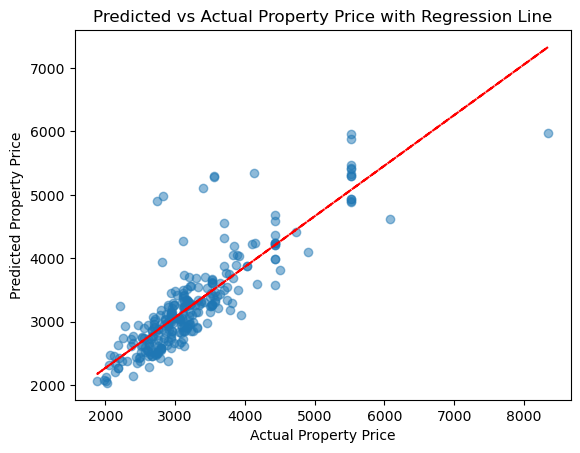

In [513]:
regression_line = LinearRegression()
regression_line.fit(valid_y.values.reshape(-1, 1), ca_lm_pred)
y_regression_line = regression_line.predict(valid_y.values.reshape(-1, 1))

# Plot scatter plot for actual and predicted property prices
plt.scatter(valid_y, ca_lm_pred, alpha=0.5)
plt.plot(valid_y, y_regression_line, color='r', linestyle='--')  # Regression line
plt.xlabel("Actual Property Price")
plt.ylabel("Predicted Property Price")
plt.title("Predicted vs Actual Property Price with Regression Line")
plt.show()




## Random Forest Regression Model

In [514]:
# Define variables
Var_Predictions = ['MinPrice', 'MaxPrice', 'NRooms', 'NBath', 'sqft', 'Accessbility Score', 'city_Berkeley, CA ',
       'city_Campbell, CA ', 'city_Cupertino, CA ', 'city_Dublin, CA ',
       'city_Emeryville, CA ', 'city_Foster City, CA ', 'city_Fremont, CA ',
       'city_Hayward, CA ', 'city_Lafayette, CA ', 'city_Menlo Park, CA ',
       'city_Milpitas, CA ', 'city_Mountain View, CA ', 'city_Newark, CA ',
       'city_Oakland, CA ', 'city_Pleasanton, CA ', 'city_Redwood City, CA ',
       'city_Richmond, CA ', 'city_San Francisco, CA ', 'city_San Jose, CA ',
       'city_San Mateo, CA ', 'city_San Rafael, CA ', 'city_San Ramon, CA ',
       'city_Santa Clara, CA ', 'city_Santa Cruz, CA ', 'city_Sunnyvale, CA ',
       'city_Tiburon, CA ', 'city_Union City, CA ', 'city_Walnut Creek, CA ']

Target = 'Property Price'

# Divide data
X = ca[Var_Predictions]
y = ca[Target]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Train the random forest model
rf = RandomForestRegressor(n_estimators=200, random_state=1)
rf.fit(train_X, train_y)

# Make predictions on the validation set
predictions_rf = rf.predict(valid_X)

# Calculate Regression Statistics
mae_rf = mean_absolute_error(valid_y, predictions_rf)
mse_rf = mean_squared_error(valid_y, predictions_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(valid_y, predictions_rf)

print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)


Mean Absolute Error (MAE): 271.0360166916417
Mean Squared Error (MSE): 196478.79366765634
Root Mean Squared Error (RMSE): 443.2592849198495
R-squared (R2): 0.698394681155679


## Visualizing Feature Importance

                    feature  importance       std
7        city_Campbell, CA     0.000008  0.000031
32     city_Union City, CA     0.000012  0.000056
17  city_Mountain View, CA     0.000024  0.000114
18         city_Newark, CA     0.000033  0.000133
14      city_Lafayette, CA     0.000054  0.000225
11    city_Foster City, CA     0.000062  0.000187
6        city_Berkeley, CA     0.000068  0.000199
22       city_Richmond, CA     0.000083  0.000171
31        city_Tiburon, CA     0.000144  0.000615
29     city_Santa Cruz, CA     0.000186  0.000640
9          city_Dublin, CA     0.000211  0.000539
15     city_Menlo Park, CA     0.000237  0.000802
8       city_Cupertino, CA     0.000352  0.000668
19        city_Oakland, CA     0.000360  0.000822
27      city_San Ramon, CA     0.000413  0.000741
21   city_Redwood City, CA     0.000459  0.001313
20     city_Pleasanton, CA     0.000557  0.001136
26     city_San Rafael, CA     0.000595  0.001395
13        city_Hayward, CA     0.000691  0.001148


<Figure size 2000x1200 with 0 Axes>

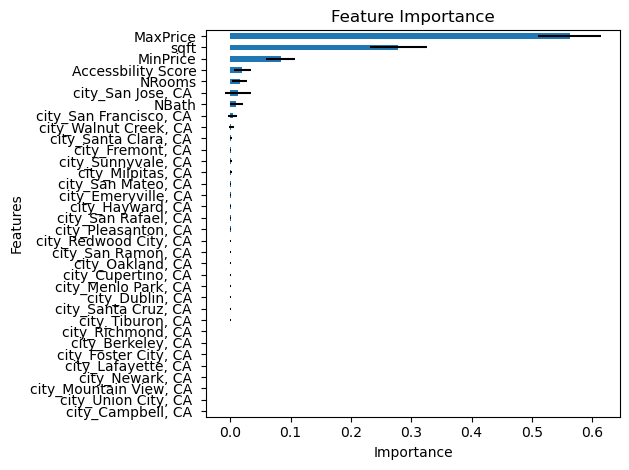

In [516]:
#Plot For Understanding variable importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

features = ['MinPrice', 'MaxPrice', 'NRooms', 'NBath', 'sqft', 'Accessbility Score', 
            'city_Berkeley, CA ', 'city_Campbell, CA ', 'city_Cupertino, CA ', 'city_Dublin, CA ',
            'city_Emeryville, CA ', 'city_Foster City, CA ', 'city_Fremont, CA ', 'city_Hayward, CA ',
            'city_Lafayette, CA ', 'city_Menlo Park, CA ', 'city_Milpitas, CA ', 'city_Mountain View, CA ',
            'city_Newark, CA ', 'city_Oakland, CA ', 'city_Pleasanton, CA ', 'city_Redwood City, CA ',
            'city_Richmond, CA ', 'city_San Francisco, CA ', 'city_San Jose, CA ', 'city_San Mateo, CA ',
            'city_San Rafael, CA ', 'city_San Ramon, CA ', 'city_Santa Clara, CA ', 'city_Santa Cruz, CA ',
            'city_Sunnyvale, CA ', 'city_Tiburon, CA ', 'city_Union City, CA ', 'city_Walnut Creek, CA ']

variables_df = pd.DataFrame({'feature': features, 'importance': importances, 'std': std})
variables_df = variables_df.sort_values('importance')
print(variables_df)
variables_df.to_csv('variables_list.csv', index=True)

# Plotting the bar graph
plt.figure(figsize=(20, 12))
ax = variables_df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('Features')
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')

plt.tight_layout()
plt.show()


### XGBoost Regression Model

In [517]:
#Define Variables
selected_columns = ['MinPrice', 'MaxPrice', 'NRooms', 'NBath', 'sqft', 'Accessbility Score', 'city_Berkeley, CA ', 'city_Campbell, CA ', 'city_Cupertino, CA ', 'city_Dublin, CA ',
                'city_Emeryville, CA ', 'city_Foster City, CA ', 'city_Fremont, CA ', 'city_Hayward, CA ',
                'city_Lafayette, CA ', 'city_Menlo Park, CA ', 'city_Milpitas, CA ', 'city_Mountain View, CA ',
                'city_Newark, CA ', 'city_Oakland, CA ', 'city_Pleasanton, CA ', 'city_Redwood City, CA ',
                'city_Richmond, CA ', 'city_San Francisco, CA ', 'city_San Jose, CA ', 'city_San Mateo, CA ',
                'city_San Rafael, CA ', 'city_San Ramon, CA ', 'city_Santa Clara, CA ', 'city_Santa Cruz, CA ',
                'city_Sunnyvale, CA ', 'city_Tiburon, CA ', 'city_Union City, CA ', 'city_Walnut Creek, CA ']


X = ca[selected_columns]
y = ca['Property Price']

# Divid the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the XGBoost regressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(train_X, train_y)

# Prediction on the validation set
test_y_pred = xgb_regressor.predict(test_X)

# Calculate evaluation metrics
mse = mean_squared_error(test_y, test_y_pred)
r2 = r2_score(test_y, test_y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 382461.20418559783
R-squared: 0.5473084834495008
